In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config):
    pass  # init sessin with allow_growth

# SimpleRNN

In [3]:
from tensorflow.keras.layers import InputLayer, SimpleRNN

In [4]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(3,4)))
model.add(SimpleRNN(units=2, use_bias=False, return_sequences=True))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3, 2)              12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train = np.array([  [ [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0] ] ] )
Wxh = np.array([[0, 0],
                [0, 0],
                [0, 1],
                [0, 0]])
Whh = np.array([[1, 0],
                [0, 1]])
model.set_weights([Wxh, Whh])

In [7]:
print('Wxh')
print(model.get_weights()[0])
print('Whh')
print(model.get_weights()[1])
assert len(model.get_weights()) == 2
print('X')
print(x_train[0, 0], x_train[0, 1], x_train[0, 2])
assert x_train.shape == (1, 3, 4)

Wxh
[[0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]
Whh
[[1. 0.]
 [0. 1.]]
X
[0 0 0 1] [0 0 1 0] [0 1 0 0]


In [8]:
print(model.predict(x_train))

[[[0.        0.       ]
  [0.        0.7615942]
  [0.        0.642015 ]]]


In [9]:
np.tanh(0.7615942)

0.6420150179019382

# Time Distributed

In [13]:
from tensorflow.keras.layers import InputLayer, TimeDistributed, Dense

In [14]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(3,4)))
#model.add(SimpleRNN(units=2, use_bias=False, return_sequences=True))
model.add(TimeDistributed(Dense(units=2, use_bias=False)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 3, 2)              8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_train = np.array([  [ [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0] ] ] )
Wd = np.array([[0, 0],
               [1, 0],
               [0, 2],
               [0, 0]])
model.set_weights([Wd])

In [16]:
print('Wd')
print(model.get_weights()[0])
print('X')
print(x_train[0, 0], x_train[0, 1], x_train[0, 2])
assert x_train.shape == (1, 3, 4)

Wd
[[0. 0.]
 [1. 0.]
 [0. 2.]
 [0. 0.]]
X
[0 0 0 1] [0 0 1 0] [0 1 0 0]


In [17]:
model.predict(x_train)

array([[[0., 0.],
        [0., 2.],
        [1., 0.]]], dtype=float32)

# Embedding

In [39]:
from tensorflow.keras.layers import InputLayer, Embedding

In [65]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(3,)))
model.add(Embedding(input_dim=4, output_dim=4))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 3, 4)              16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [66]:
#x_train = np.array([  [ [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0] ] ] )
x_train = np.array([  [ 0, 1, 2 ] ] )

In [67]:
model.get_weights()

[array([[-0.04623235, -0.00243106, -0.00980903,  0.04009164],
        [ 0.00958375, -0.04722828,  0.03170497,  0.0034303 ],
        [-0.02904195,  0.01173012,  0.0304899 ,  0.00080044],
        [-0.00844502, -0.01765589,  0.00976507,  0.01679393]],
       dtype=float32)]

In [68]:
model.predict(x_train)

array([[[-0.04623235, -0.00243106, -0.00980903,  0.04009164],
        [ 0.00958375, -0.04722828,  0.03170497,  0.0034303 ],
        [-0.02904195,  0.01173012,  0.0304899 ,  0.00080044]]],
      dtype=float32)

# Dense on non-flat input

In [28]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(3,4)))
#model.add(SimpleRNN(units=2, use_bias=False, return_sequences=True))
model.add(Dense(units=2, use_bias=False))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3, 2)              8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [36]:
print('Wd')
print(model.get_weights()[0])
print('X')
print(x_train[:, 0, :], x_train[:, 1, :], x_train[:, 2, :])
assert x_train.shape == (1, 3, 4)

Wd
[[ 0.14180565  0.3559146 ]
 [-0.0596149  -0.6523454 ]
 [-0.0288806   0.8688328 ]
 [ 0.07899237  0.96307135]]
X
[[0 0 0 1]] [[0 0 1 0]] [[0 1 0 0]]


In [37]:
model.predict(x_train)

array([[[ 0.07899237,  0.96307135],
        [-0.0288806 ,  0.8688328 ],
        [-0.0596149 , -0.6523454 ]]], dtype=float32)

In [25]:
tf.keras.utils.plot_model(model, '/tmp/aa.png', show_shapes=True)

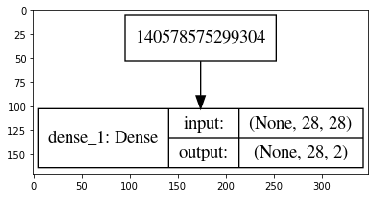

In [27]:
plt.imshow(plt.imread('/tmp/aa.png'))